<a href="https://colab.research.google.com/github/Kenneth-Hom/Kenneth_Carbon_Emissions/blob/main/Carbon_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install pandas
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.stats.multicomp as mc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [43]:
!pip install scikit-learn

import sklearn

In [18]:
import pandas as pd
df = pd.read_csv('SupplyChainGHGEmissionFactors_v1.3.0_NAICS_byGHG_USD2022.csv')
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0


In [19]:
df.columns

Index(['2017 NAICS Code', '2017 NAICS Title', 'GHG', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Reference USEEIO Code'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                18288 non-null  int64  
 1   2017 NAICS Title                               18288 non-null  object 
 2   GHG                                            18288 non-null  object 
 3   Unit                                           18288 non-null  object 
 4   Supply Chain Emission Factors without Margins  18288 non-null  float64
 5   Margins of Supply Chain Emission Factors       18288 non-null  float64
 6   Supply Chain Emission Factors with Margins     18288 non-null  float64
 7   Reference USEEIO Code                          18288 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


How much do industries contribute to climate change?

In [21]:
df.describe()

,2017 NAICS Code,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
count,18288.000000,1.828800e+04,1.828800e+04,1.828800e+04
mean,424917.376969,1.022439e-02,8.167654e-04,1.104055e-02
std,164865.428749,6.376527e-02,5.772884e-03,6.669205e-02
min,111110.000000,1.970000e-11,0.000000e+00,1.970000e-11
25%,325588.250000,1.330000e-09,0.000000e+00,1.580000e-09
50%,423700.000000,1.420000e-08,0.000000e+00,1.650000e-08
75%,532111.250000,3.387500e-07,1.610000e-09,3.500000e-07
max,813990.000000,3.790000e+00,1.090000e-01,3.860000e+00


In [22]:
df.isna()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
18283,False,False,False,False,False,False,False,False
18284,False,False,False,False,False,False,False,False
18285,False,False,False,False,False,False,False,False
18286,False,False,False,False,False,False,False,False


In [23]:
df.dropna(axis = 0, how='all', subset=None)

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0
...,...,...,...,...,...,...,...,...
18283,813990,"Other Similar Organizations (except Business, ...",Perfluorobutane,"kg/2022 USD, purchaser price",9.950000e-10,0.000000e+00,9.950000e-10,813B00
18284,813990,"Other Similar Organizations (except Business, ...",Nitrogen trifluoride,"kg/2022 USD, purchaser price",9.340000e-10,0.000000e+00,9.340000e-10,813B00
18285,813990,"Other Similar Organizations (except Business, ...",Hexafluoroethane,"kg/2022 USD, purchaser price",1.320000e-09,0.000000e+00,1.320000e-09,813B00
18286,813990,"Other Similar Organizations (except Business, ...",Carbon dioxide,"kg/2022 USD, purchaser price",9.390000e-02,0.000000e+00,9.390000e-02,813B00


In [24]:
df.fillna(df.mean)

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0
...,...,...,...,...,...,...,...,...
18283,813990,"Other Similar Organizations (except Business, ...",Perfluorobutane,"kg/2022 USD, purchaser price",9.950000e-10,0.000000e+00,9.950000e-10,813B00
18284,813990,"Other Similar Organizations (except Business, ...",Nitrogen trifluoride,"kg/2022 USD, purchaser price",9.340000e-10,0.000000e+00,9.340000e-10,813B00
18285,813990,"Other Similar Organizations (except Business, ...",Hexafluoroethane,"kg/2022 USD, purchaser price",1.320000e-09,0.000000e+00,1.320000e-09,813B00
18286,813990,"Other Similar Organizations (except Business, ...",Carbon dioxide,"kg/2022 USD, purchaser price",9.390000e-02,0.000000e+00,9.390000e-02,813B00


In [25]:
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0


In [26]:
category = df['2017 NAICS Title']
value = df['Supply Chain Emission Factors with Margins']

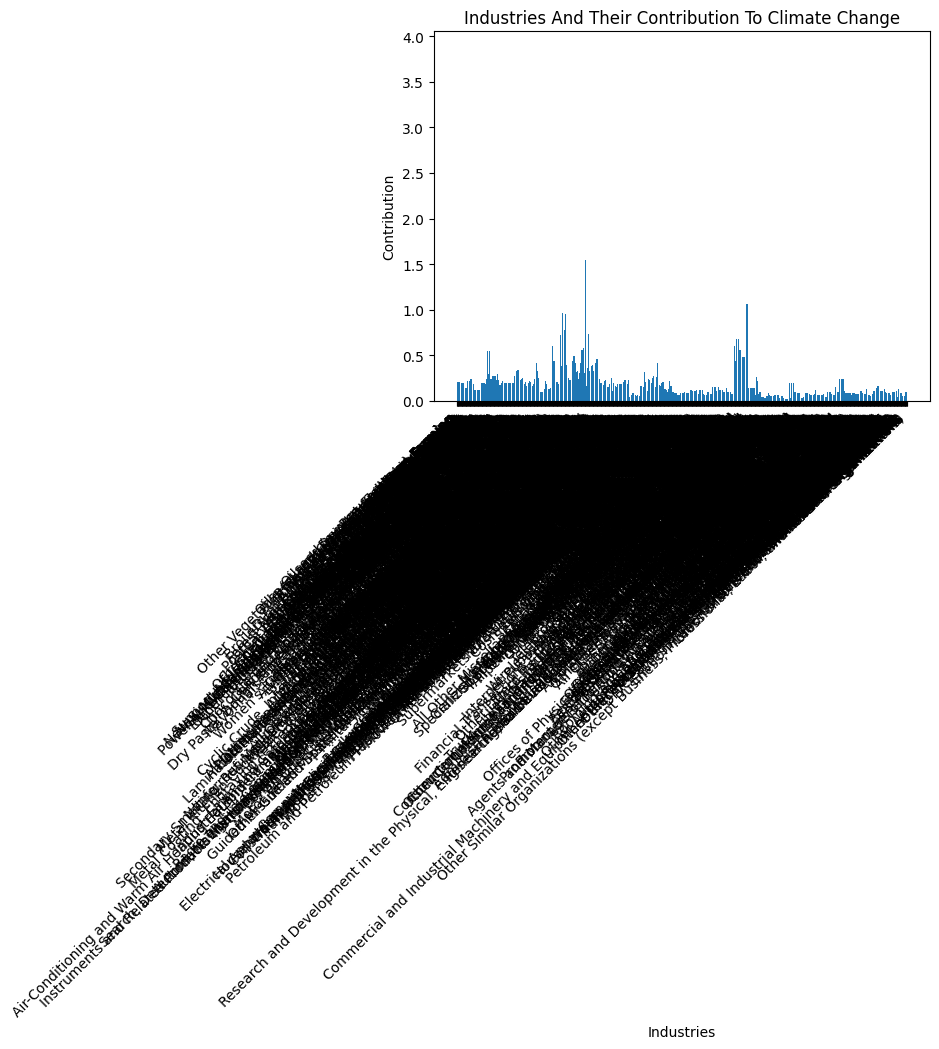

In [11]:
plt.bar(category, value)
plt.title("Industries And Their Contribution To Climate Change")
plt.xlabel("Industries")
plt.ylabel("Contribution")
plt.xticks(rotation=45, ha="right")
plt.show()

In [27]:
features = df.drop(columns = 'GHG')
label = df['GHG']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model = KNeighborsClassifier(n_neighbors=3)

In [46]:
X_train.head()

,2017 NAICS Code,2017 NAICS Title,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
11490,484122,"General Freight Trucking, Long-Distance, Less ...","kg/2022 USD, purchaser price",2.570000e-09,0.000000e+00,2.570000e-09,484000
5035,327110,"Pottery, Ceramics, and Plumbing Fixture Manufa...","kg/2022 USD, purchaser price",2.220000e-09,1.360000e-09,3.580000e-09,327100
15189,561499,All Other Business Support Services,"kg/2022 USD, purchaser price",2.040000e-09,0.000000e+00,2.040000e-09,561400
542,112111,Beef Cattle Ranching and Farming,"kg/2022 USD, purchaser price",3.850000e-03,2.840000e-06,3.850000e-03,1121A0
7834,336212,Truck Trailer Manufacturing,"kg/2022 USD, purchaser price",3.920000e-10,1.300000e-10,5.220000e-10,336212


In [47]:
y_train.head()

,GHG
11490,HFC-236fa
5035,Hexafluoroethane
15189,Hexafluoroethane
542,Nitrous oxide
7834,Perfluorohexane


In [48]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'General Freight Trucking, Long-Distance, Less Than Truckload'

t_stat, p_val = ttest_ind

print(t_stat)
print(p_val)

comp = mc.MultiComparison(df['num_var'], df['cat_var'])


